In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('cambodia_major_dataset_v18_50majors.csv')
print("Initial DataFrame shape:", df.shape)
df.head(10)


Initial DataFrame shape: (500, 25)


,Student_ID,Gender,Province,School_Type,Parent_Expectation,Stream,Khmer,English,Math,Physics,...,Earth,Interest_Tech,Interest_Business,Interest_Health,Interest_Design,Interest_Law,Career_Goal,WorkPreference,Personality,Recommend_Major
0,S001861,Female,Battambang,Private,Engineer,Science,A,B,D,C,...,NaN,Strong Interest,Very Low Interest,Moderate Interest,Very Strong Interest,Moderate Interest,Healthcare,Field,Ambivert,Civil Engineering
1,S000354,Male,Pursat,Private,IT Specialist,Science,D,A,E,C,...,NaN,Moderate Interest,Low Interest,Moderate Interest,Very Strong Interest,Moderate Interest,PublicSector,Team,Extrovert,Media and Communication
2,S001334,Female,Koh Kong,Public,Business Owner,Social-Science,A,D,D,NaN,...,C,Moderate Interest,Low Interest,Low Interest,Strong Interest,Strong Interest,Corporate,Office,Extrovert,Public Health
3,S000906,Male,Ratanakiri,Private,Banker,Social-Science,B,B,C,NaN,...,D,Moderate Interest,Strong Interest,Strong Interest,Strong Interest,Very Strong Interest,Entrepreneur,Field,Extrovert,Medicine
4,S001290,Male,Svay Rieng,Public,IT Specialist,Science,C,C,C,C,...,NaN,Strong Interest,Very Strong Interest,Very Strong Interest,Moderate Interest,Very Low Interest,Entrepreneur,Field,Ambivert,Architecture
5,S001274,Male,Kep,Private,Government Officer,Science,D,D,D,C,...,NaN,Very Strong Interest,Very Strong Interest,Moderate Interest,Low Interest,Low Interest,Creative,Field,Introvert,English Literature
6,S000939,Female,Prey Veng,Private,Teacher,Science,A,C,C,B,...,NaN,Very Strong Interest,Moderate Interest,Strong Interest,Moderate Interest,Strong Interest,Corporate,Team,Ambivert,Nursing
7,S001732,Male,Banteay Meanchey,Private,Banker,Science,B,C,A,D,...,NaN,Very Strong Interest,Strong Interest,Low Interest,Moderate Interest,Very Low Interest,Research,Office,Extrovert,Philosophy
8,S000066,Female,Pailin,Private,Accountant,Social-Science,C,A,D,NaN,...,B,Low Interest,Moderate Interest,Very Low Interest,Moderate Interest,Very Low Interest,PublicSector,Office,Introvert,Computer Science
9,S001324,Female,Kratie,Private,Teacher,Social-Science,B,A,C,NaN,...,C,Low Interest,Very Strong Interest,Moderate Interest,Moderate Interest,Very Low Interest,Healthcare,Team,Ambivert,Software Engineering


In [2]:
df['Recommend_Major'].value_counts()

Recommend_Major
Accounting                               31
Medicine                                 27
Information Technology                   27
Computer Science                         26
Marketing                                25
English Literature                       24
Law                                      23
Business Management                      20
Finance and Banking                      19
Nursing                                  17
Philosophy                               15
Public Health                            12
Architecture                             12
Software Engineering                     11
Political Science                        11
Civil Engineering                        11
International Relations                  11
Economics                                10
Entrepreneurship                          9
Tourism and Hospitality Management        9
Dentistry                                 8
Human Resource Management                 8
Environmental Sc

In [3]:
# Drop Student ID if exists
if 'Student_ID' in df.columns:
    df = df.drop(columns=['Student_ID'])

In [4]:
df.describe()

,Gender,Province,School_Type,Parent_Expectation,Stream,Khmer,English,Math,Physics,Chemistry,...,Earth,Interest_Tech,Interest_Business,Interest_Health,Interest_Design,Interest_Law,Career_Goal,WorkPreference,Personality,Recommend_Major
count,500,500,500,500,500,500,500,500,254,254,...,246,500,500,500,500,500,500,500,500,500
unique,2,24,3,10,2,6,6,6,6,6,...,6,5,5,5,5,5,7,4,3,50
top,Male,Pursat,Public,Banker,Science,C,C,C,C,C,...,C,Moderate Interest,Moderate Interest,Moderate Interest,Moderate Interest,Moderate Interest,PublicSector,Team,Ambivert,Accounting
freq,261,26,332,55,254,145,163,142,84,73,...,72,172,138,151,160,169,93,135,176,31


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              500 non-null    object
 1   Province            500 non-null    object
 2   School_Type         500 non-null    object
 3   Parent_Expectation  500 non-null    object
 4   Stream              500 non-null    object
 5   Khmer               500 non-null    object
 6   English             500 non-null    object
 7   Math                500 non-null    object
 8   Physics             254 non-null    object
 9   Chemistry           254 non-null    object
 10  Biology             254 non-null    object
 11  History             500 non-null    object
 12  Geography           246 non-null    object
 13  Morality            246 non-null    object
 14  Earth               246 non-null    object
 15  Interest_Tech       500 non-null    object
 16  Interest_Business   500 no

In [6]:
# Check for missing values
df.isnull().sum()

Gender                  0
Province                0
School_Type             0
Parent_Expectation      0
Stream                  0
Khmer                   0
English                 0
Math                    0
Physics               246
Chemistry             246
Biology               246
History                 0
Geography             254
Morality              254
Earth                 254
Interest_Tech           0
Interest_Business       0
Interest_Health         0
Interest_Design         0
Interest_Law            0
Career_Goal             0
WorkPreference          0
Personality             0
Recommend_Major         0
dtype: int64

/var/folders/fz/0kddjr8d5csg39qgnh81p22c0000gn/T/ipykernel_29414/1698086883.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
/var/folders/fz/0kddjr8d5csg39qgnh81p22c0000gn/T/ipykernel_29414/1698086883.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
/var/folders/fz/0kddjr8d5csg39qgnh81p22c0000gn/T/ipykernel_29414/1698086883.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)


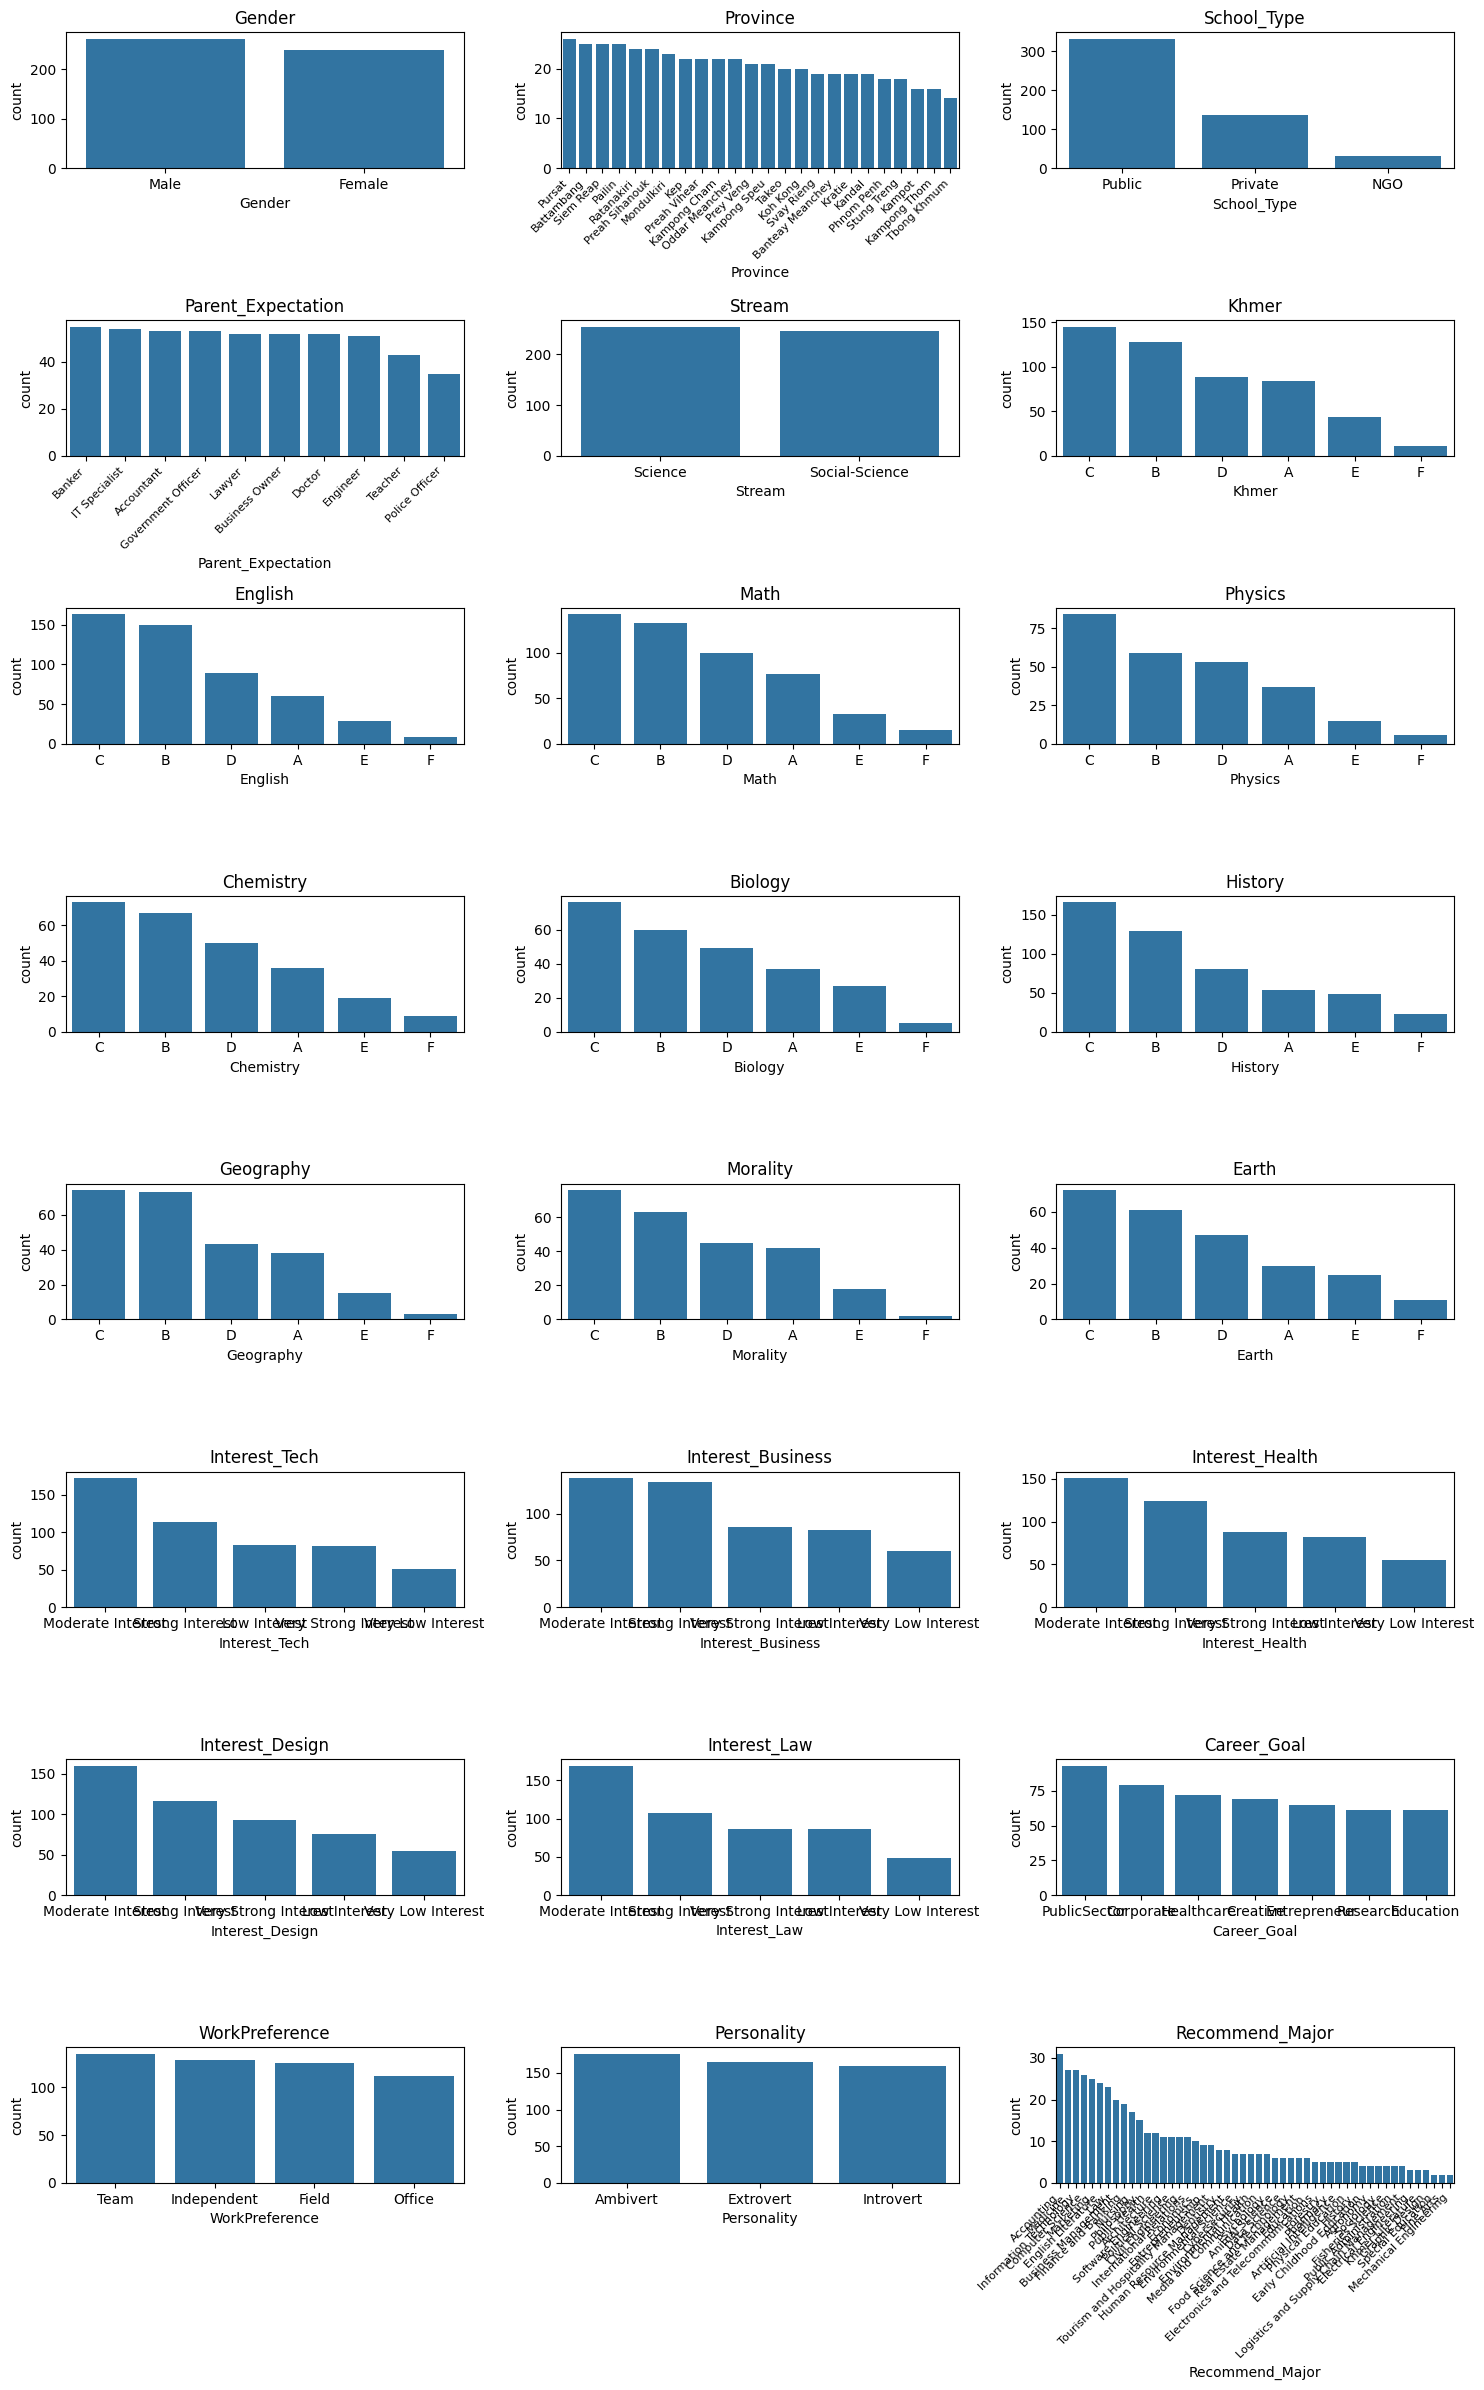

In [7]:
# Visulize feature distribution
def plot_feature_distributions(df, id_cols=('student_id', 'id'), ncols=3, figsize_per_plot=(5, 3), categorical_thresh=30):
    cols = df.columns
    plot_cols = [c for c in cols if c.lower() not in set(id_cols)]
    n_plots = len(plot_cols)
    nrows = int(np.ceil(n_plots / ncols))

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*figsize_per_plot[0], nrows*figsize_per_plot[1]))
    axes = axes.flatten()

    for i, col in enumerate(plot_cols):
        ax = axes[i]
        series = df[col]
        if series.dtype == 'O' or series.nunique() <= categorical_thresh:
            sns.countplot(x=col, data=df, order=series.value_counts().index, ax=ax)
            if series.nunique() > 8:
                ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
        else:
            sns.histplot(series.dropna(), kde=True, ax=ax)
        ax.set_title(col)

    # hide any unused subplots
    for j in range(n_plots, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# example usage
plot_feature_distributions(df)


In [8]:
# Split dataset into features and target
X = df.drop(columns=['Recommend_Major'])
y = df['Recommend_Major'].astype(str)
print(X.shape)
print(y.shape)

(500, 23)
(500,)


In [9]:
# Encode features (per-column LabelEncoder)
cat_cols = X.select_dtypes(include=['object']).columns
encoders = {}
for c in cat_cols:
    le = LabelEncoder()
    X[c] = le.fit_transform(X[c].astype(str))
    encoders[c] = le  # keep for inference on new data

# Encode target
target_le = LabelEncoder()
y_enc = target_le.fit_transform(y)

print("Encoded Target Arrays:", np.unique(y).__len__())
print("Encoded Target Arrays:", y_enc.shape, np.unique(y_enc))

Encoded Target Arrays: 50
Encoded Target Arrays: (500,) [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


In [10]:
# Encoded feature table
X

,Gender,Province,School_Type,Parent_Expectation,Stream,Khmer,English,Math,Physics,Chemistry,...,Morality,Earth,Interest_Tech,Interest_Business,Interest_Health,Interest_Design,Interest_Law,Career_Goal,WorkPreference,Personality
0,0,1,1,4,0,0,1,3,2,3,...,6,6,2,3,1,4,1,4,0,0
1,1,17,1,6,0,3,0,4,2,1,...,6,6,1,0,1,4,1,5,3,1
2,0,8,2,2,1,0,3,3,6,6,...,2,2,1,0,0,2,2,0,2,1
3,1,18,1,1,1,1,1,2,6,6,...,3,3,1,2,2,2,4,3,0,1
4,1,21,2,6,0,2,2,2,2,2,...,6,6,2,4,4,1,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,6,1,0,0,1,2,2,3,2,...,6,6,1,2,2,2,0,0,3,0
496,0,6,1,0,0,0,2,3,3,1,...,6,6,1,2,2,0,2,0,1,0
497,1,14,2,1,0,1,2,1,2,1,...,6,6,2,3,4,3,2,4,1,2
498,0,9,2,0,1,0,1,1,6,6,...,3,1,4,2,1,1,0,6,3,2


/var/folders/fz/0kddjr8d5csg39qgnh81p22c0000gn/T/ipykernel_29414/1698086883.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
/var/folders/fz/0kddjr8d5csg39qgnh81p22c0000gn/T/ipykernel_29414/1698086883.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)


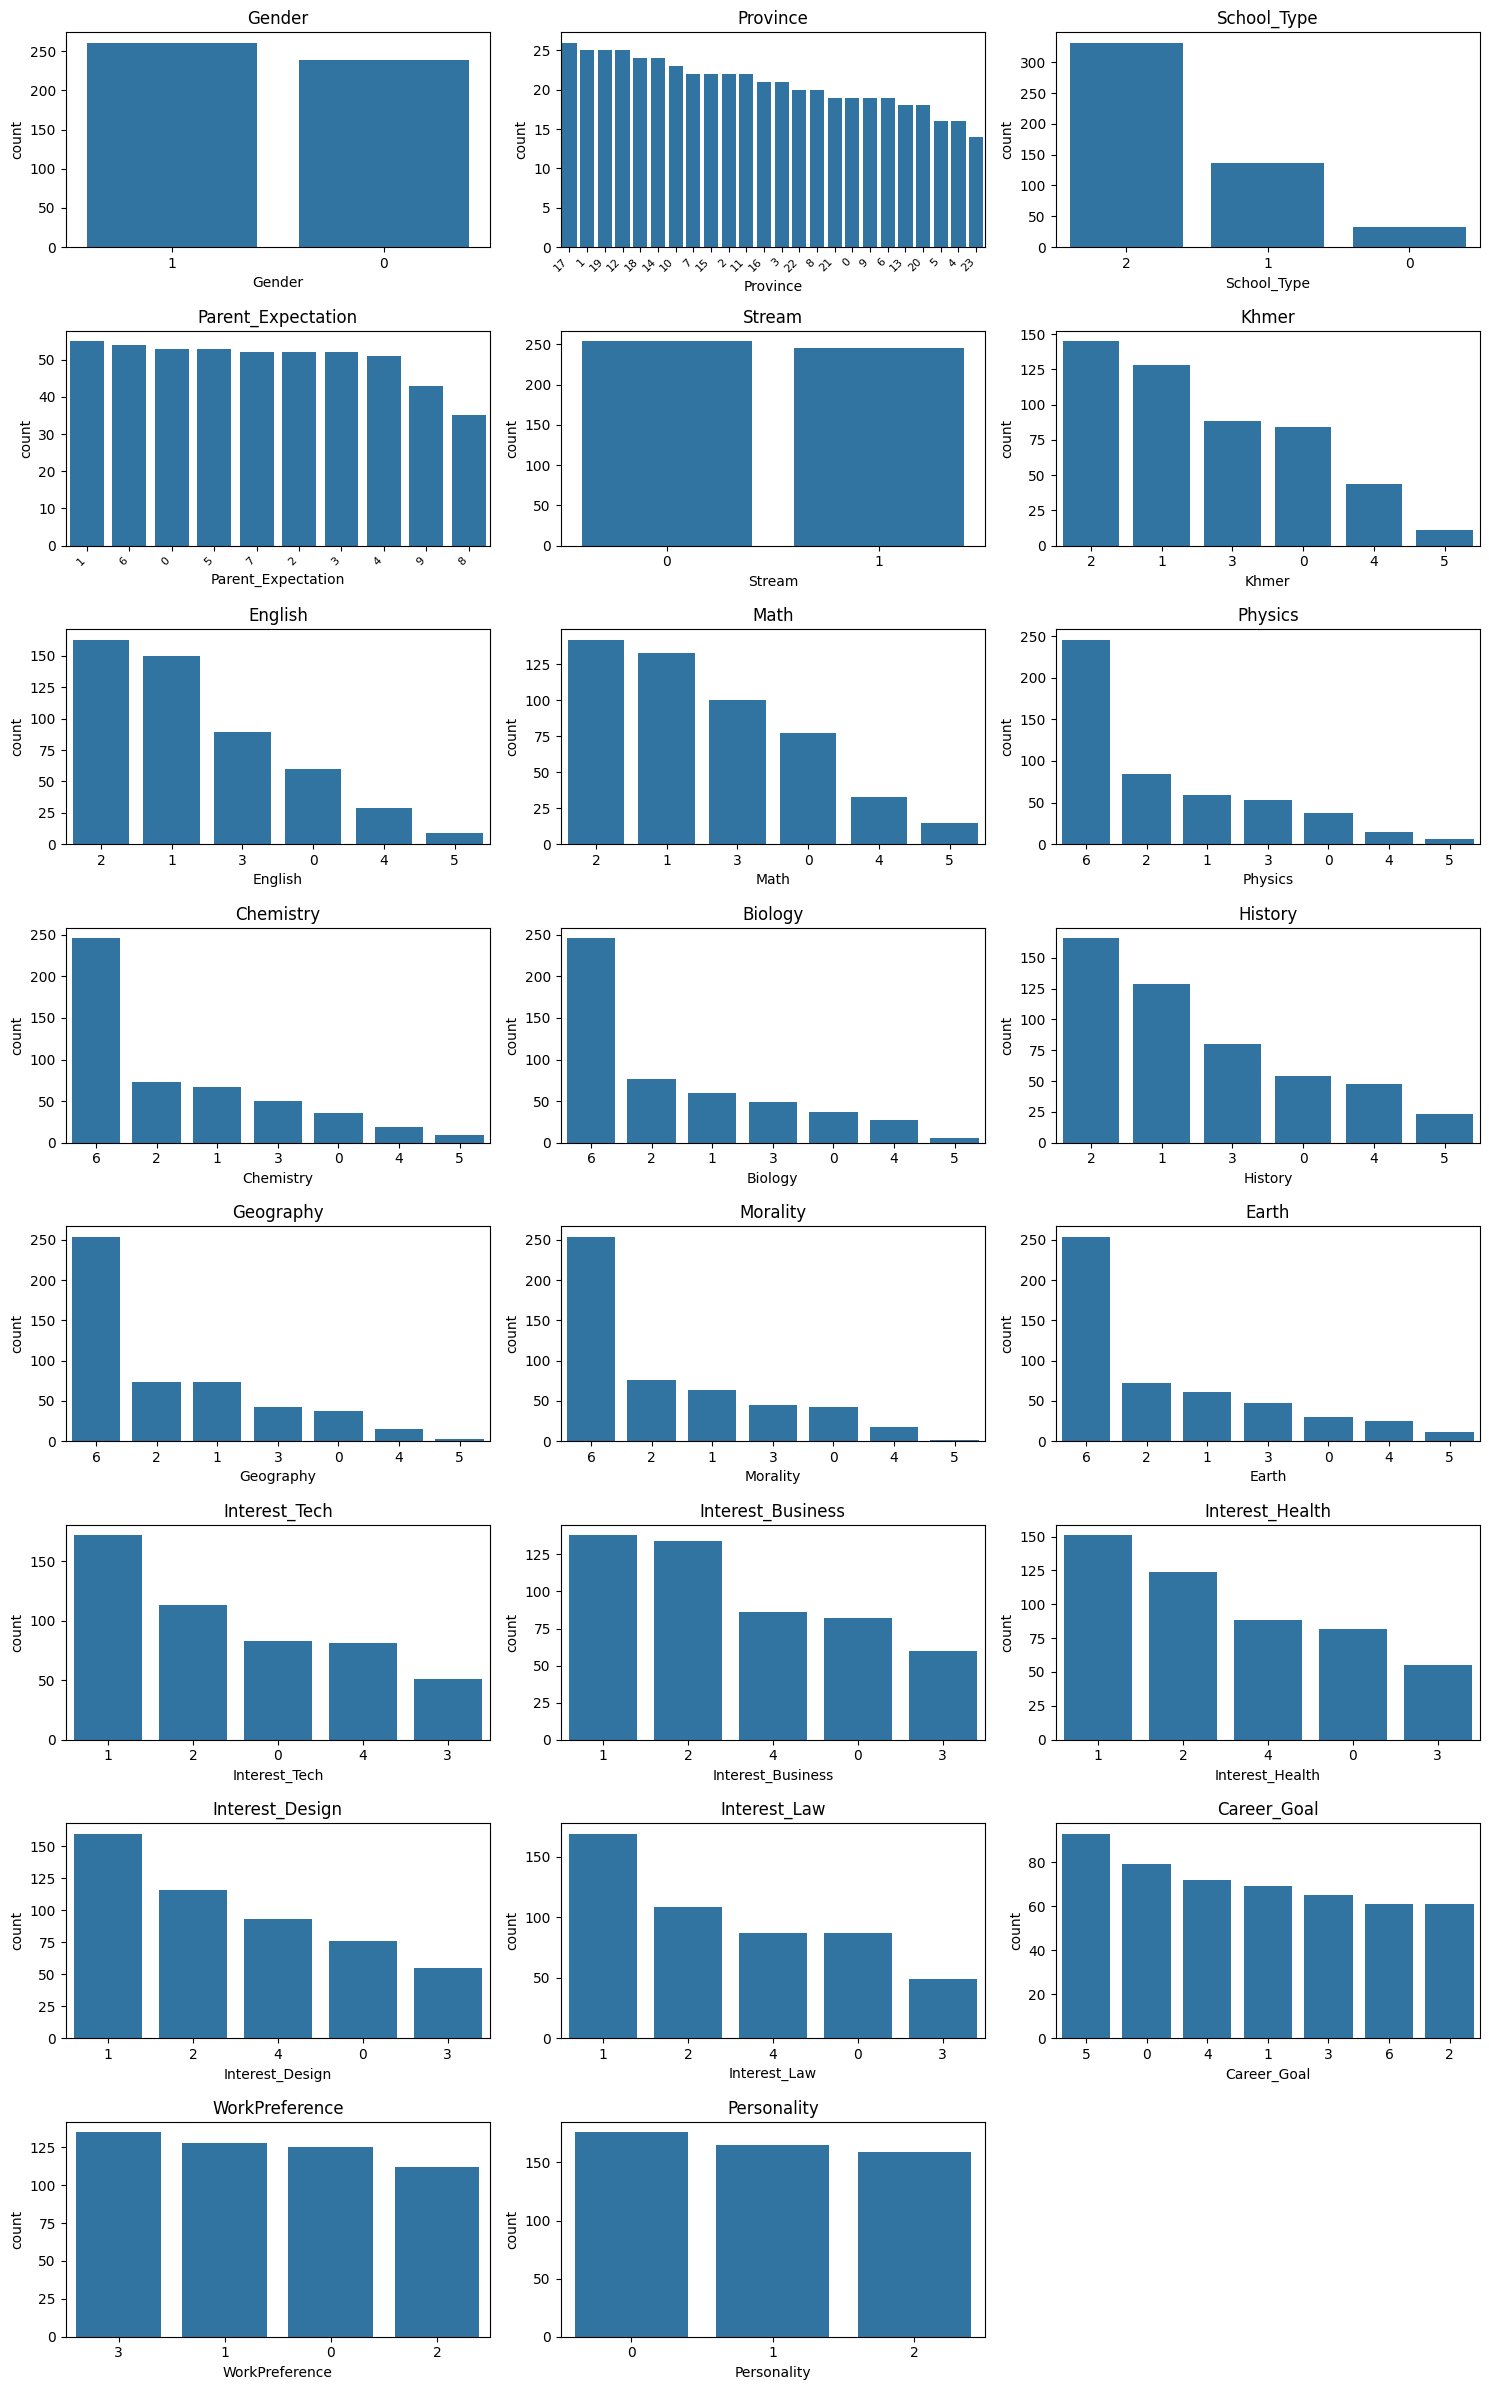

In [11]:
plot_feature_distributions(X)

In [12]:

# Train model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X, y_enc)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


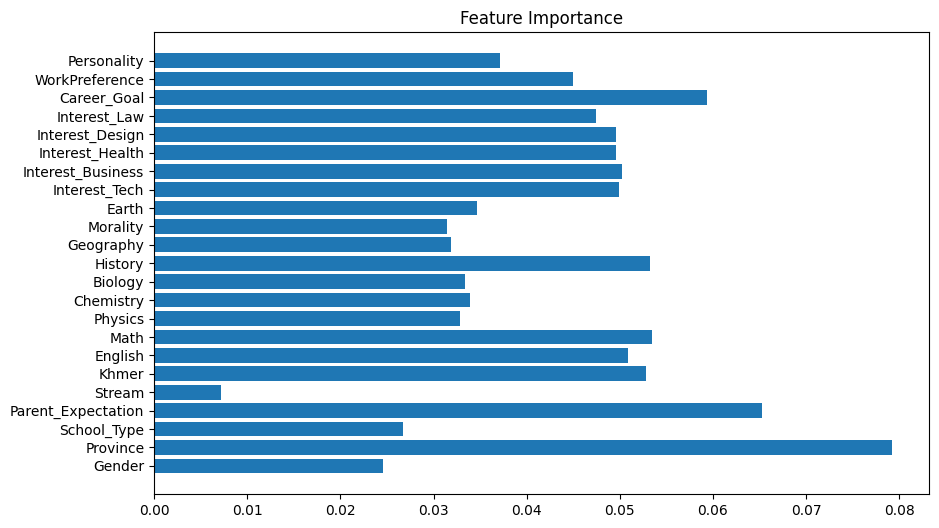

In [13]:
# Feature importance
importances = model.feature_importances_
feat_names = X.columns

plt.figure(figsize=(10,6))
plt.barh(feat_names, importances)
plt.title("Feature Importance")
plt.show()

In [14]:
# 7) Save model
import os
import joblib

# ensure the output directory exists to avoid FileNotFoundError
os.makedirs('model', exist_ok=True)

joblib.dump(model, 'model/rf_model.pkl')
joblib.dump(encoders, 'model/feature_encoders.pkl')
joblib.dump(target_le, 'model/target_encoder.pkl')

['model/target_encoder.pkl']

In [15]:
# 8) Load model (example)
loaded_model = joblib.load('model/rf_model.pkl')
loaded_encoders = joblib.load('model/feature_encoders.pkl')
loaded_target_le = joblib.load('model/target_encoder.pkl')

In [16]:
# Predict top-k majors for a new student
def predict_top_majors(new_row,
             model=loaded_model,
             encoders=loaded_encoders,
             target_le=loaded_target_le,
             df=df,
             X=X,
             top_k=10):
  """
  Prepare a single new_row (dict), encode it with saved encoders and predict top_k majors.
  Returns a DataFrame with columns ['Major', 'Similarity'] sorted by probability desc.
  """
  # copy input
  row = new_row.copy()

  # ensure every feature expected by the model is present; fill missing with the mode from the original dataframe
  for col in X.columns:
    if col not in row or pd.isna(row.get(col)):
      row[col] = df[col].mode()[0]

  # create DataFrame (single row) with the same column order as X
  new_data = pd.DataFrame([row], columns=X.columns)

  # encode categorical features using the stored encoders
  for col, le in encoders.items():
    # ensure strings to match encoder training
    new_data[col] = new_data[col].astype(str)

    # if unseen label, replace with the original column mode
    val = new_data[col].iloc[0]
    if val not in le.classes_:
      new_data[col] = df[col].mode()[0]

    # final transform (guard against any remaining issues)
    try:
      new_data[col] = le.transform(new_data[col].astype(str))
    except ValueError:
      # fallback to mode then transform
      new_data[col] = df[col].mode()[0]
      new_data[col] = le.transform(new_data[col].astype(str))

  # now predict top-k majors by probability
  proba = model.predict_proba(new_data)[0]  # shape (n_classes,)
  top_idx = np.argsort(proba)[::-1][:top_k]
  top_probs = proba[top_idx]
  top_majors = target_le.inverse_transform(top_idx)

  # rescale probabilities to 0-1 range relative to the top probability (avoid division by zero)
  max_p = top_probs.max() if len(top_probs) > 0 else 0.0
  if max_p > 0:
    top_probs = top_probs / max_p
  # optional: round for display
  top_probs = np.round(top_probs, 3)

  # return results
  return pd.DataFrame({'Major': top_majors, 'Similarity': top_probs}).reset_index(drop=True)

In [17]:
# Predict on new data (example)
# Build a single-row dict for the new sample. Fill any unknown/missing entries with the column mode from the original df.
new_row = {
    'Gender': 'Male',
    'Province': 'Phnom Penh',
    'School_Type': 'Public',
    'Parent_Expectation': 'Teacher',
    'Stream': 'Science',
    'Khmer': 'C',
    'English': 'B',
    'Math': 'B',
    'Physics': 'A',
    'Chemistry': 'A',
    'Biology': 'B',
    'History': 'A',
    # use numpy NaN for missing values
    'Geography': np.nan,
    'Morality': np.nan,
    'Earth': np.nan,
    'Interest_Tech': 'Strong Interest',
    'Interest_Business': 'Moderate Interest',
    'Interest_Health': 'Low Interest',
    'Interest_Design': 'Very Strong Interest',
    'Interest_Law': 'Moderate Interest',
    'Career_Goal': 'Healthcare',
    'WorkPreference': 'Field',
    'Personality': 'Ambivert'
}

# example usage with the `new_row` defined above
top10 = predict_top_majors(new_row)
print(top10)

                 Major  Similarity
0           Philosophy       1.000
1             Medicine       0.424
2            Marketing       0.424
3           Accounting       0.364
4  Business Management       0.333
5     Computer Science       0.273
6  Finance and Banking       0.242
7            Education       0.242
8                  Law       0.212
9     Entrepreneurship       0.182


In [18]:
# Final_Score = 0.5*Similarity + 0.1*Popularity + 0.2*SuccessRate + 0.1*Salary + 0.1*Demand
import pandas as pd

major_stats = pd.read_csv("major_stats_cambodia_v1.csv")

def calculate_final_scores(top_majors_df, major_stats=major_stats, sim_weight=0.3, pop_weight=0.1, success_weight=0.2, salary_weight=0.2, demand_weight=0.2 ):
    """
    top_majors_df must have columns:
      - 'Major' (string name matching Recommend_Major in major_stats)
      - 'Similarity' (float, from model.predict_proba)
    """
    # Merge on the correct name column
    merged = top_majors_df.merge(
        major_stats,
        left_on="Major",
        right_on="Recommend_Major",
        how="left"
    )

    # Optional: sanity check for majors not found in major_stats
    if merged["Popularity"].isna().any():
        missing = merged.loc[merged["Popularity"].isna(), "Major"].unique().tolist()
        print("Warning: majors not found in major_stats:", missing)

    # Compute Final_Score using the actual column names
    merged["Final_Score"] = (
        sim_weight * merged["Similarity"] +
        pop_weight * merged["Popularity"] +
        success_weight * merged["SuccessRate"] +
        salary_weight * merged["Salary"] +
        demand_weight * merged["Demand"]
    )

    # Sort and return tidy columns
    final_ranking = merged.sort_values(by="Final_Score", ascending=False)

    return final_ranking[[
        "Major", "Final_Score", "Similarity",
        "Popularity", "SuccessRate", "Salary", "Demand"
    ]]

# Example:
final_recommendations = calculate_final_scores(top10)
final_recommendations.head(5)


,Major,Final_Score,Similarity,Popularity,SuccessRate,Salary,Demand
4,Business Management,0.6911,0.333,0.980,0.952,0.725,0.789
0,Philosophy,0.6908,1.000,0.554,0.784,0.373,0.520
5,Computer Science,0.6679,0.273,0.706,0.921,0.727,0.929
2,Marketing,0.6493,0.424,0.887,0.873,0.720,0.574
1,Medicine,0.6481,0.424,0.587,0.699,0.811,0.801
